In [1]:
import math

import seaborn as sns
import numpy as np
import pandas as pd
import formulas

from evaluation import Evaluation
from solnet import SolNet

from matplotlib import pyplot as plt

In [2]:
kyiv = SolNet(50.45,30.52,1.5,locations=1)

Gathering data from base location...


In [3]:
data = Evaluation(kyiv.data[0][0]['poa_direct'],kyiv.data[0][0]['poa_sky_diffuse'])

In [5]:
data.metrics()

,MSE,Var(x),Var(y),Corr,Bias,Conditional bias 1,Resolution,Conditional bias 2,Discrimination
Metrics,"26,582.62","39,635.10","8,789.86",0.61,805.65,"52,307.17","75,471.98","95,352.66","145,076.32"


c:\Users\jdepoort\Anaconda3\envs\SolNet\lib\site-packages\seaborn\axisgrid.py:1760: UserWarning: Glyph 65533 (\N{REPLACEMENT CHARACTER}) missing from current font.
  f.tight_layout()
c:\Users\jdepoort\Anaconda3\envs\SolNet\lib\site-packages\seaborn\distributions.py:1185: UserWarning: The following kwargs were not used by contour: 'c'
  cset = contour_func(
c:\Users\jdepoort\Anaconda3\envs\SolNet\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 65533 (\N{REPLACEMENT CHARACTER}) missing from current font.
  func(*args, **kwargs)


<Figure size 700x700 with 0 Axes>

c:\Users\jdepoort\Anaconda3\envs\SolNet\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 65533 (\N{REPLACEMENT CHARACTER}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


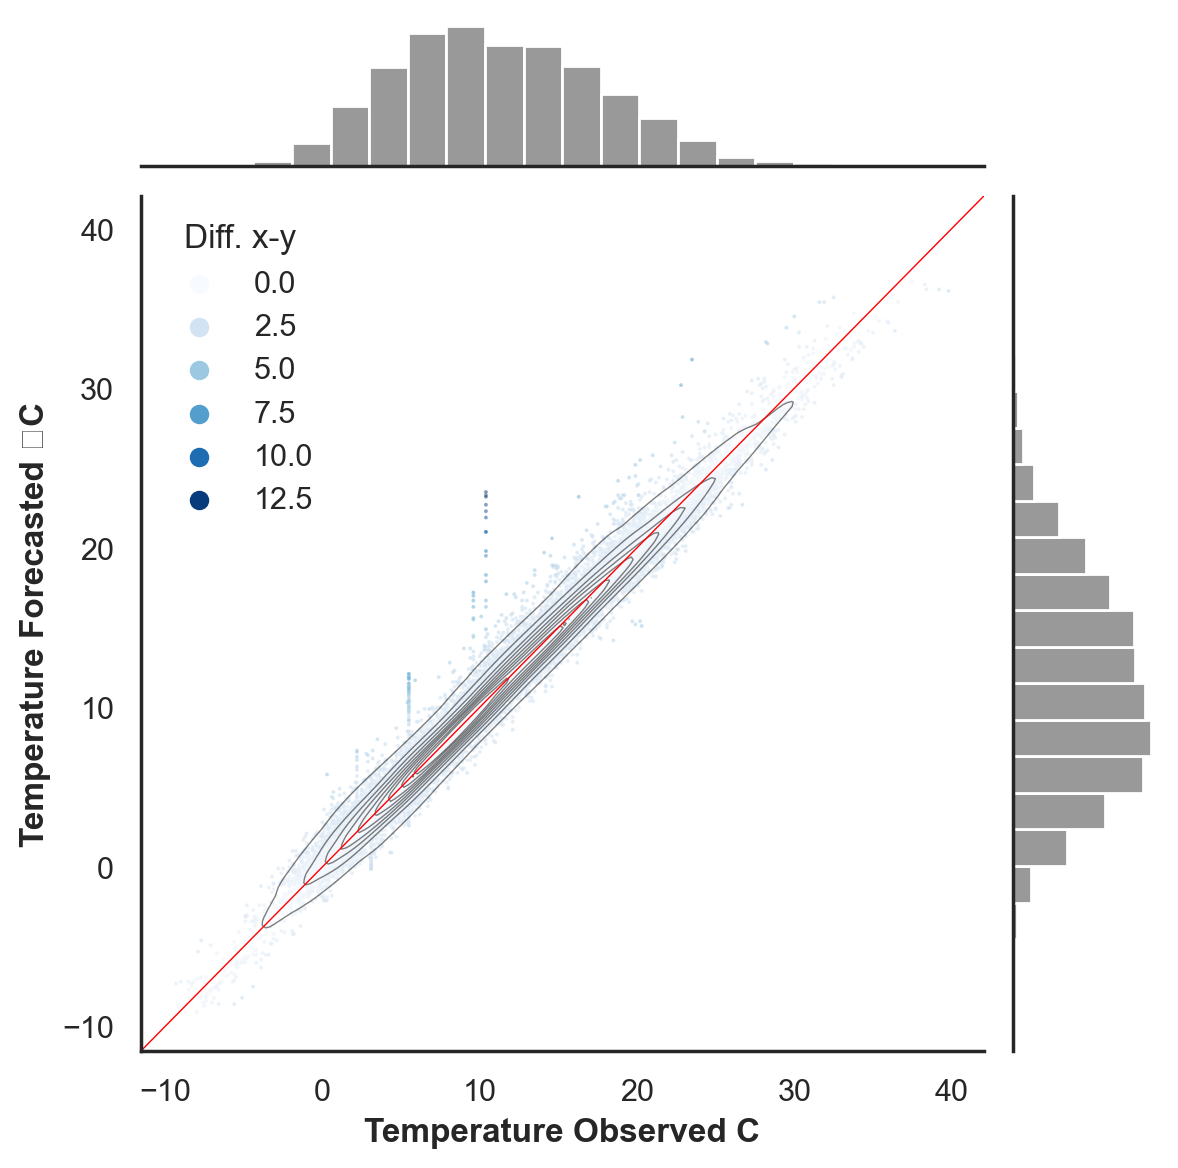

In [20]:
data.plot_joint()